**Boxplot Age Distribution by Gender Graph Back-end code Introduction**

Expect function: Users can input the desired disease name and then obtain the incidence data of the disease on men and women of different ages through a box plot

Author: Wesley Xu

- AI generated comments are used
- 1 Datasets_size = 20 patients_info
- Due to the original data request from hapi.fhir.org is generated, some patients have a negative age (born in the future), so that those people are been filtered and will not shown on the graph. This cost the input datasets size will different than the actual datasets shown on graph.

**AI Generated Introduction:**
This script fetches and analyzes healthcare data for patients with a specific condition (e.g., Asthma) using the HAPI FHIR API. It includes functions to:

1. **Filter Numeric Patient IDs**: Ensures patient IDs are purely numeric using regular expressions.
2. **Calculate Age**: Computes patient age from the birth date using Python's `datetime`.
3. **Retrieve Patient Details**: Gathers gender and age for patients with the specified condition.
4. **Visualize Data**: Displays age distribution by gender in a boxplot for better understanding of patient demographics.

The script emphasizes data fetching, validation, and visualization, providing insights into the age and gender distribution of patients affected by a particular medical condition.

In [1]:
import requests                   # for fetch data from FHIR
from datetime import datetime     # for Calculate Age
import matplotlib.pyplot as plt   # for visualization
import re                         # for regular expression filtering for abnormal information

Data request functions:

The `fetch_patient_details` function inputs a `patient_id` and outputs the patient's gender and age.

The `fetch_conditions_and_patients` function takes a medical `condition` and a `request_limit` as inputs and returns a list of patient details, including ID, gender, and age, for patients with the specified condition.

In [6]:
def fetch_conditions_and_patients(condition, request_limit):
    # Construct the base URL for the condition search, limiting the returned elements to 'subject'
    base_url = f"https://hapi.fhir.org/baseR4/Condition?_content={condition}&_elements=subject"
    header = {"Accept": "application/fhir+json"}
    patient_details = []

    # Loop to make requests, limited by request_limit
    for _ in range(request_limit):
        response = requests.get(base_url, headers=header).json()
        if "entry" in response:
            for entry in response['entry']:
                resource = entry['resource']
                # Extract the patient ID from the subject reference
                patient_id = resource['subject']['reference'].split('/')[1]

                # Check if the patient ID contains only digits using a regular expression
                if is_pure_numeric_id(patient_id):
                    # Fetch patient details for valid numeric IDs
                    gender, age = fetch_patient_details(patient_id)
                    # Append the patient details (including ID, gender, and age) to the list
                    patient_details.append({"id": patient_id, "gender": gender, "age": age})
        
        # Check for a link to the next page of results in the response
        next_link = [link['url'] for link in response.get('link', []) if link['relation'] == 'next']
        if next_link:
            # Update the base URL to request the next page
            base_url = next_link[0]
        else:
            # Exit the loop if there are no more pages
            break

    # Return the list of patient details
    return patient_details

def fetch_patient_details(patient_id):
    # Construct the URL to request patient details with specific elements: gender and birthDate
    base_url = f"https://hapi.fhir.org/baseR4/Patient/{patient_id}?_elements=gender,birthDate"
    header = {"Accept": "application/fhir+json"}
    response = requests.get(base_url, headers=header).json()
    
    # Extract gender and birth date from the response, use defaults if not found
    gender = response.get("gender", "Unknown")
    birth_date = response.get("birthDate", None)
    
    # Initialize age as None, it will be calculated if birth date is available
    age = None
    if birth_date:
        # Calculate age based on the birth date
        age = calculate_age(birth_date)
    
    # Return both gender and calculated age
    return gender, age

Functions used for filtering abnormal information and caculate age

In [7]:
def is_pure_numeric_id(s):
    return re.match(r'^\d+$', s) is not None

def calculate_age(birth_date_str):
    birth_date = datetime.strptime(birth_date_str, "%Y-%m-%d")
    today = datetime.today()
    return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))

Functions used for visualization:

In [8]:
def plot_age_distribution_by_gender(patient_info, condition):
    # Calculate age lists for males and females separately
    ages_male = [p['age'] for p in patient_info if p['gender'] == 'male']
    ages_female = [p['age'] for p in patient_info if p['gender'] == 'female']
    
    # Prepare data: group ages by gender
    ages_by_gender = {'Male': ages_male, 'Female': ages_female}
    
    # Create a boxplot
    fig, ax = plt.subplots()
    # The boxplot function takes a list of values for each category (in this case, gender) and plots them as separate boxplots. 
    # The 'labels' parameter assigns a label to each boxplot corresponding to the keys in the 'ages_by_gender' dictionary.
    ax.boxplot(ages_by_gender.values(), labels=ages_by_gender.keys())
    
    # Set chart title and axis labels
    # The title includes the condition being analyzed, specifies that it's a boxplot, and shows the distribution of age by gender.
    # It also includes the total number of patients analyzed in the title for additional context.
    ax.set_title(f'{condition} Boxplot: Age Distribution by Gender ({len(patient_info)} patients)')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Age')
    
    # Display the chart
    plt.show()

call the functions：
- 'condition' represents the NAME of the disease.
- 1 'Datasets_size' = 20 'info' in 'patient_info' (Larger datasets will result longer requesting time)

{'id': '10672603', 'gender': 'male', 'age': 0}
{'id': '10683749', 'gender': 'female', 'age': 0}
{'id': '10723499', 'gender': 'female', 'age': 0}
{'id': '10769105', 'gender': 'male', 'age': 35}
{'id': '10769186', 'gender': 'male', 'age': 36}
{'id': '7033576', 'gender': 'male', 'age': 40}
{'id': '10907891', 'gender': 'female', 'age': 0}
{'id': '10913946', 'gender': 'male', 'age': 23}
{'id': '10945139', 'gender': 'male', 'age': 0}
{'id': '10957578', 'gender': 'male', 'age': 36}
{'id': '1393673', 'gender': 'female', 'age': 44}
{'id': '2126234', 'gender': 'male', 'age': 25}
{'id': '2126234', 'gender': 'male', 'age': 25}
{'id': '2126234', 'gender': 'male', 'age': 25}
{'id': '2126234', 'gender': 'male', 'age': 25}
{'id': '10981594', 'gender': 'female', 'age': 32}
{'id': '10982201', 'gender': 'female', 'age': 0}
{'id': '10987068', 'gender': 'male', 'age': 28}
{'id': '11033709', 'gender': 'female', 'age': 35}
{'id': '11044637', 'gender': 'female', 'age': 0}
{'id': '1457354', 'gender': 'female',

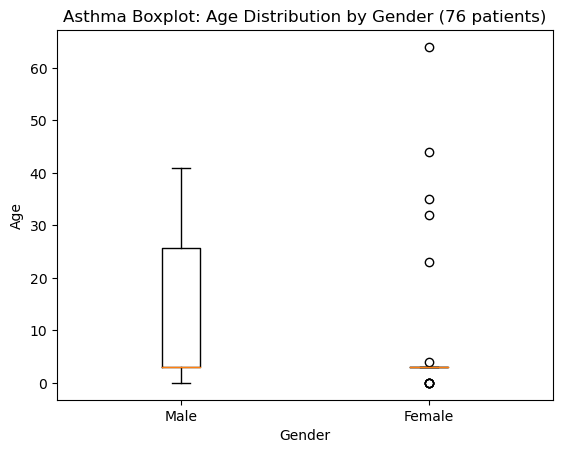

In [10]:
# You can ask user to input those two variables:
condition = "Asthma"  
Datasets_size = 5

patient_info = fetch_conditions_and_patients(condition, Datasets_size)
for info in patient_info:
    print(info)

plot_age_distribution_by_gender(patient_info, condition)